Iniciando descriptografia AES: arquivo 218
Descriptografia AES finalizada: arquivo 218
Tempo de execução: 0.00180 segundos

Iniciando descriptografia AES: arquivo 219
Descriptografia AES finalizada: arquivo 219
Tempo de execução: 0.00150 segundos

Iniciando descriptografia AES: arquivo 220
Descriptografia AES finalizada: arquivo 220
Tempo de execução: 0.00148 segundos

Iniciando descriptografia AES: arquivo 221
Descriptografia AES finalizada: arquivo 221
Tempo de execução: 0.00157 segundos

Iniciando descriptografia AES: arquivo 222
Descriptografia AES finalizada: arquivo 222
Tempo de execução: 0.00196 segundos

Iniciando descriptografia AES: arquivo 223
Descriptografia AES finalizada: arquivo 223
Tempo de execução: 0.00141 segundos

Iniciando descriptografia AES: arquivo 224
Descriptografia AES finalizada: arquivo 224
Tempo de execução: 0.00153 segundos

Iniciando descriptografia AES: arquivo 225
Descriptografia AES finalizada: arquivo 225
Tempo de execução: 0.00148 segundos

Iniciand

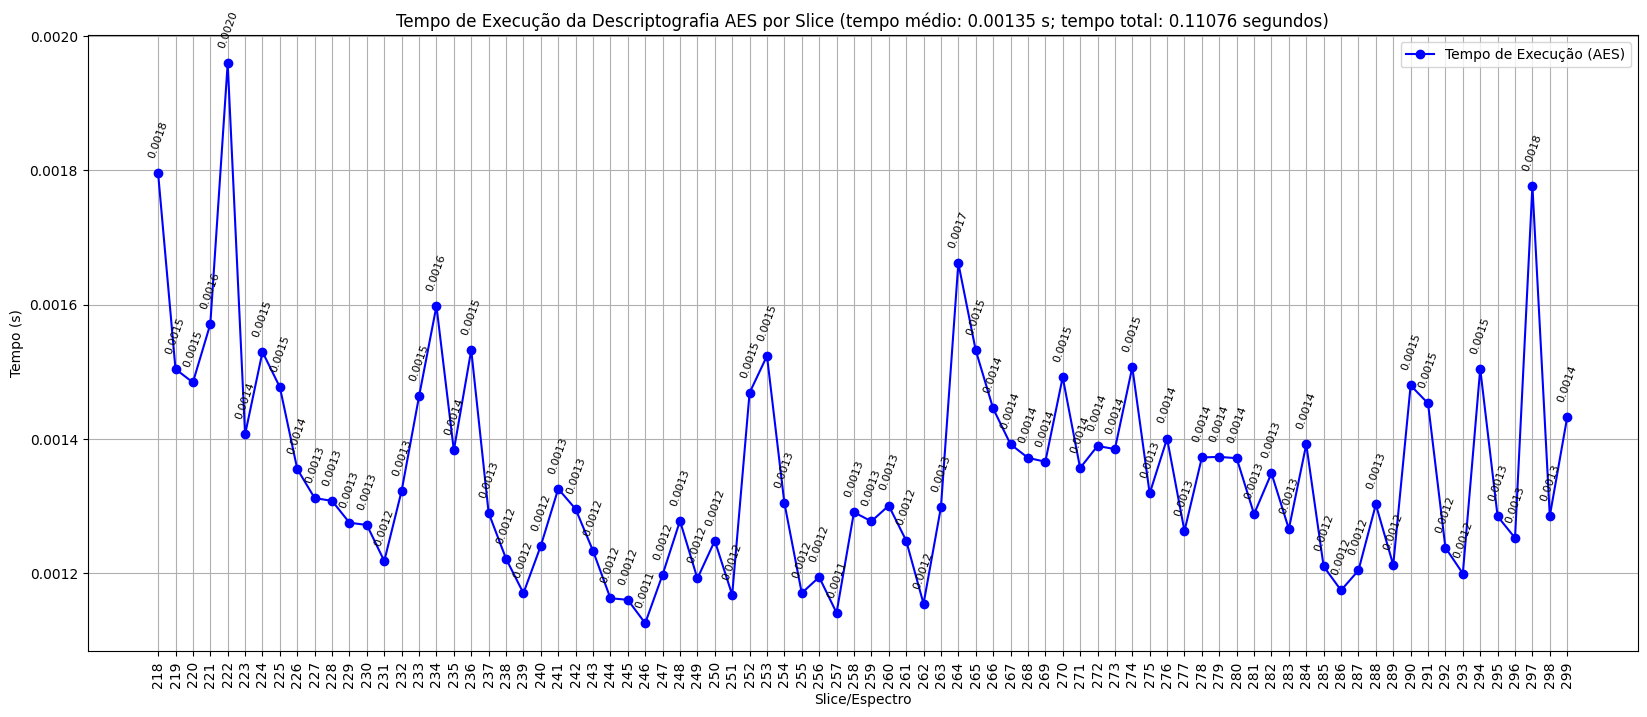

In [6]:
import time
import numpy as np
from Crypto.Cipher import AES
import matplotlib.pyplot as plt
import os

# Carrega a chave AES previamente salva
with open("aes_key.pem", "rb") as key_file:
    aes_key = key_file.read()

tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando descriptografia AES: arquivo {rodagem}')

    caminho_entrada = f"AES_crypto_spectrum_metrics/AES_spectrum_criptografado_{rodagem}.enc"
    caminho_saida = f"AES_decrypt_spectrum_metrics/AES_spectrum_descriptografado_{rodagem}.png"
    os.makedirs("AES_decrypt_spectrum_metrics", exist_ok=True)

    try:
        with open(caminho_entrada, "rb") as enc_file:
            nonce = enc_file.read(16)       # 16 bytes
            tag = enc_file.read(16)         # 16 bytes
            ciphertext = enc_file.read()    # restante é o dado criptografado

        cipher_aes = AES.new(aes_key, AES.MODE_EAX, nonce)
        decrypted_data = cipher_aes.decrypt_and_verify(ciphertext, tag)

        with open(caminho_saida, "wb") as out_file:
            out_file.write(decrypted_data)

        fim = time.perf_counter()
        tempo_execucao = fim - inicio
        tempos_execucao.append(tempo_execucao)
        execucoes.append(rodagem)

        print(f'Descriptografia AES finalizada: arquivo {rodagem}')
        print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

    except (ValueError, FileNotFoundError) as e:
        print(f"Erro na descriptografia do arquivo {rodagem}: {e}\n")

if tempos_execucao:
    print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f} segundos')

# Geração do gráfico
plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='blue', label='Tempo de Execução (AES)')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks(execucoes, rotation=90)
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Descriptografia AES por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_aes_descriptografia_espectro.png')
plt.show()